In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# Chapter ‍11 Going 3D: The PDB module

Bio.PDB : a Biopython module that focuses on working with crystal structures of biological macromolecules

Bio.PDB includes a PDBParser class that produces a Structure object, which can be used to access the atomic data in the file in a convenient manner. There is limited support for parsing the information contained in the PDB header.

All the Worldwide Protein Data Bank (wwPDB) sites uses the macromolecular Crystallographic Information File (mmCIF) data dictionaries to describe the information content of PDB entries. mmCIF uses a flexible and extensible key-value pair format for representing macromolecular structural data and imposes no limitations for the number of atoms, residues or chains that can be represented in a single PDB entry 

## 11.1 Reading and writing crystal structure files

In [2]:
from Bio.PDB import *

In [3]:
pdbl = PDBList()
pdbl.retrieve_pdb_file("1FAT")

Structure exists: '/home/leejh/sdb/Biopython-tutorial/fa/1fat.cif' 


'/home/leejh/sdb/Biopython-tutorial/fa/1fat.cif'

### 11.1.1 Reading an mmCIF file

In [4]:
from Bio.PDB.MMCIFParser import MMCIFParser

In [5]:
# creat a structure object from an mmCIF file
parser = MMCIFParser()
structure = parser.get_structure("1fat", "./fa/1fat.cif")

In [6]:
# reading an mmCIF file
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
mmcif_dict = MMCIF2Dict('./fa/1fat.cif')

In [7]:
# Example: get the solvent content from an mmCIF file:
sc = mmcif_dict["_exptl_crystal.density_percent_sol"]
sc

['45.9']

In [8]:
# Example: get the list of the y coordinates of all atom
y_list = mmcif_dict["_atom_site.Cartn_y"]
y_list

['12.385',
 '11.023',
 '10.878',
 '11.751',
 '10.684',
 '10.721',
 '9.773',
 '9.459',
 '7.970',
 '7.319',
 '9.984',
 '10.900',
 '10.684',
 '11.930',
 '7.479',
 '6.108',
 '5.208',
 '5.646',
 '6.079',
 '7.244',
 '7.802',
 '7.605',
 '3.927',
 '2.868',
 '1.642',
 '1.523',
 '2.558',
 '1.288',
 '2.283',
 '1.437',
 '0.788',
 '-0.407',
 '-1.316',
 '-0.860',
 '-0.106',
 '-1.367',
 '-2.206',
 '-1.732',
 '-3.377',
 '-2.911',
 '-3.726',
 '-4.882',
 '-2.599',
 '-3.537',
 '-4.843',
 '-5.030',
 '-3.599',
 '-3.962',
 '-5.291',
 '-3.011',
 '-5.690',
 '-3.376',
 '-4.734',
 '-5.751',
 '-7.037',
 '-8.019',
 '-7.890',
 '-6.915',
 '-8.244',
 '-9.116',
 '-8.434',
 '-8.990',
 '-9.982',
 '-11.294',
 '-11.835',
 '-10.206',
 '-8.974',
 '-7.928',
 '-8.829',
 '-6.743',
 '-7.649',
 '-6.601',
 '-11.795',
 '-13.104',
 '-14.140',
 '-15.326',
 '-13.162',
 '-12.810',
 '-12.188',
 '-12.265',
 '-11.531',
 '-13.673',
 '-14.546',
 '-13.705',
 '-12.576',
 '-15.123',
 '-14.445',
 '-15.475',
 '-14.918',
 '-15.574',
 '-16.853',

### 11.1.2 Reading files in the MMTF format
* Download test file : [`4CUP.mmtf`](https://github.com/biopython/biopython/blob/master/Tests/PDB/4CUP.mmtf)

In [9]:
!pip install mmtf-python # mmtf-python-1.1.3

In [10]:
from Bio.PDB.mmtf import MMTFParser
structure = MMTFParser.get_structure("4CUP.mmtf")

In [11]:
structure = MMTFParser.get_structure_from_url("4CUP")

In [12]:
from mmtf import fetch
decoded_data = fetch("4CUP")

In [13]:
print(decoded_data.x_coord_list)

[50.346 50.745 50.691 ... 30.213 32.249  6.377]


Download structures from the PDB : PDBList objects & retrive_pdb_file method (11.8)

### 11.1.3 Reading a PDB file
* Download test file : `pdb1fat.ent`
```
>>> from Bio.PDB import PDBList
>>> pdbl = PDBList()
>>> pdbl.download_pdb_files(["1FAT"], file_format='pdb')
```

In [14]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser(PERMISSIVE=1)

In [15]:
structure_id = "1fat"
filename = "pdb1fat.ent"
structure = parser.get_structure(structure_id, filename)

In [16]:
resolution = structure.header['resolution']
resolution

2.8

In [17]:
keywords = structure.header['keywords']
keywords

'glycoprotein, plant defense protein, lectin'

In [18]:
from Bio.PDB import parse_pdb_header
with open(filename, "r") as handle:
    header_dict = parse_pdb_header(handle)

### 11.1.4 Reading a PQR file

In [19]:
from Bio.PDB.PDBParser import PDBParser
pqr_parser = PDBParser(PERMISSIVE=1, is_pqr=True)

In [20]:
structure_id = "1fat"
filename = "pdb1fat.ent"
structure = pqr_parser.get_structure(structure_id, filename)

### 11.1.5 Reading files in the PDB XML format
That’s not yet supported, but we are definitely planning to support that in the future (it’s not a lot of work). Contact the Biopython developers via the mailing list if you need this.

### 11.1.6  Writing mmCIF files

In [21]:
from Bio.PDB.mmcifio import MMCIFIO

structure = MMTFParser.get_structure("4CUP.mmtf")

io = MMCIFIO()
io.set_structure(structure)
io.save("out.cif")

### 11.1.7 Wrting PDB files : PDBIO class

In [22]:
from Bio.PDB.PDBIO import PDBIO

parser = PDBParser()
structure = parser.get_structure("1fat", "./fa/1fat.pdb")

io = PDBIO()
io.set_structure(structure)
io.save('out.pdb')

### 11.1.8 Writing PQR files

In [23]:
from Bio.PDB.PDBIO import PDBIO

parser = PDBParser()
structure = parser.get_structure("1fat", "./fa/1fat.pdb")

io = PDBIO(is_pqr=True)
io.set_structure(structure)
io.save('out.pdb')

### 11.1.9 Writing MMTF files

In [24]:
from Bio.PDB.mmtf import MMTFIO

structure = MMTFParser.get_structure("4CUP.mmtf")

io = MMTFIO()
io.set_structure(structure)
io.save('out.mmtf')

# 11.2 Structure representation

## The Structure Object

The Structure object follows the so-called SMCRA (Structure/Model/Chain/Residue/Atom) architecture :

* A structure consists of models
* A model consists of chains
* A chain consists of residues
* A residue consists of atoms
This is the way many structural biologists/bioinformaticians think about structure, and provides a simple but efficient way to deal with structure. Additional stuff is essentially added when needed. A UML diagram of the Structure object (forgetting about the Disordered classes for now) is shown in the figure below.

In general, a child Entity object (i.e. Atom, Residue, Chain, Model) can be extracted from its parent (i.e. Residue, Chain, Model, Structure, respectively) by using an id as a key.
```
>>> child_entity = parent_entity[child_id]
```

You can also get a list of all child Entities of a parent Entity object. Note that this list is sorted in a specific way (e.g. according to chain identifier for Chain objects in a Model object).
```
>>> child_list = parent_entity.get_list()
```

You can also get the parent from a child:
```
>>> parent_entity = child_entity.get_parent()
```

At all levels of the SMCRA hierarchy, you can also extract a full id. The full id is a tuple containing all id’s starting from the top object (Structure) down to the current object. A full id for a Residue object e.g. is something like:
```
>>> full_id = residue.get_full_id()
>>> print(full_id)
("1abc", 0, "A", ("", 10, "A"))
```
This corresponds to: The Structure with id `"1abc"`

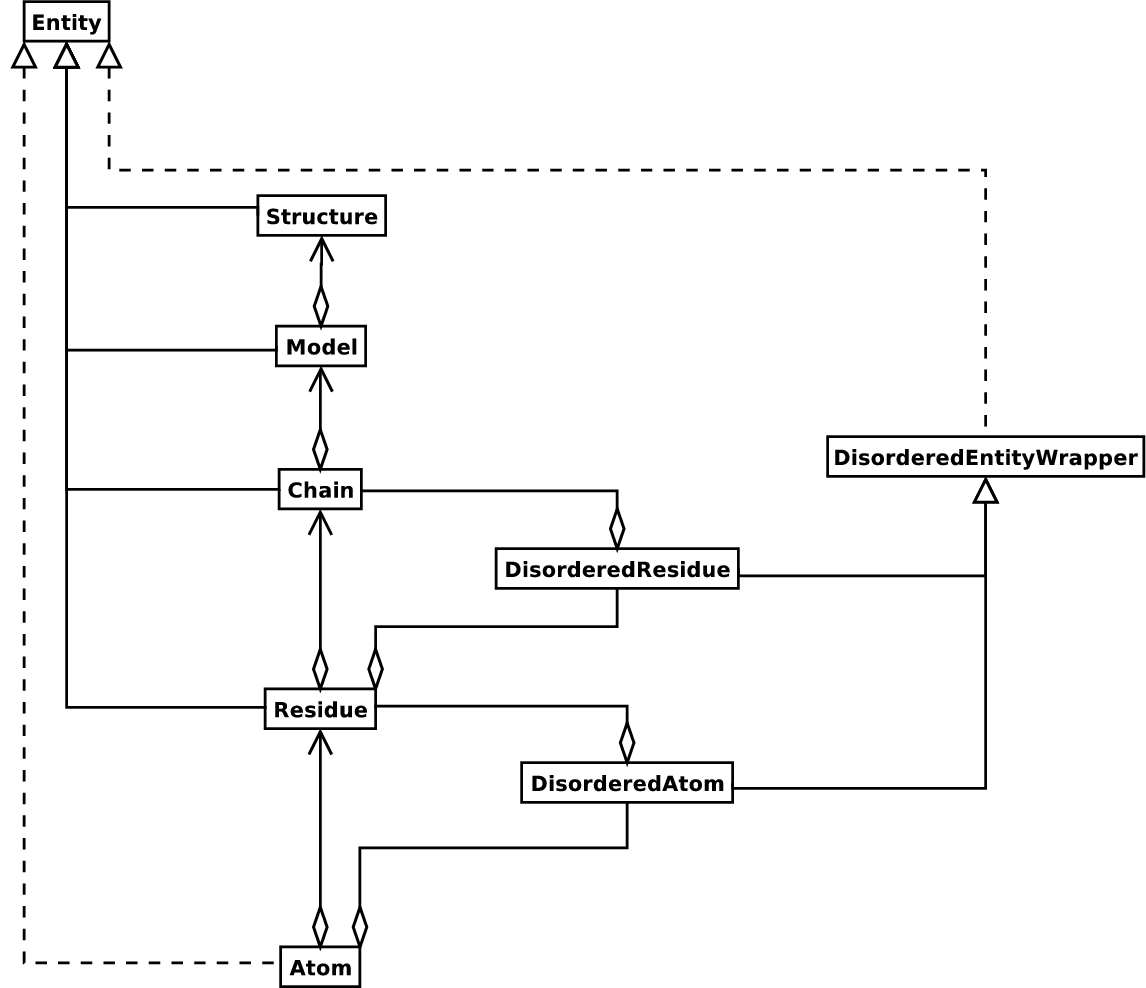

In [25]:
from IPython.display import Image
# Diagram of SMCRA architecture of the Structure object.
Image("https://biopython.org/wiki/Smcra.png")

### 11.2.1 Structure

The Structure object is at the top of the hierarchy. Its id is a user given string. The Structure contains a number of Model children. Most crystal structures (but not all) contain a single model, while NMR structures typically consist of several models. Disorder in crystal structures of large parts of molecules can also result in several models.

In [26]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser(PERMISSIVE=1)
structure_id = "1fat"
filename = "pdb1fat.ent"
structure = parser.get_structure(structure_id, filename)

In [27]:
# child Entity object can be extracted from its parent 
atoms = structure.get_atoms()
atom = next(atoms)
residue = atom.get_parent()
chain = residue.get_parent()

In [28]:
# more convenient way to do that a bit more
residues = structure.get_residues()
residue = next(residues)
chain = residue.get_parent()
atoms = chain.get_atoms()

### 11.2.2 Model

The id of the Model object is an integer, which is derived from the position of the model in the parsed file (they are automatically numbered starting from 0). Crystal structures generally have only one model (with id 0), while NMR files usually have several models. Whereas many PDB parsers assume that there is only one model, the Structure class in Bio.PDB is designed such that it can easily handle PDB files with more than one model.

In [29]:
# to get the first model from a Structure object 
first_model = structure[0]

### 11.2.3 Chain

The id of a Chain object is derived from the chain identifier in the PDB/mmCIF file, and is a single character (typically a letter). Each Chain in a Model object has a unique id. As an example, to get the Chain object with identifier “A” from a Model object, use

In [30]:
chain_A = first_model["A"]

### 11.2.4 Residue

A residue id is a tuple with three elements:

The hetero-field (hetfield): this is

'W' in the case of a water molecule;
'H_' followed by the residue name for other hetero residues (e.g. 'H_GLC' in the case of a glucose molecule);
blank for standard amino and nucleic acids.
This scheme is adopted for reasons described in section 11.4.1.

The sequence identifier (resseq), an integer describing the position of the residue in the chain (e.g., 100);

The insertion code (icode); a string, e.g. ’A’. The insertion code is sometimes used to preserve a certain desirable residue numbering scheme. A Ser 80 insertion mutant (inserted e.g. between a Thr 80 and an Asn 81 residue) could e.g. have sequence identifiers and insertion codes as follows: Thr 80 A, Ser 80 B, Asn 81. In this way the residue numbering scheme stays in tune with that of the wild type structure.

In [31]:
# Full id
residue=chain[(' ', 100, ' ')]
# Shortcut id
residue=chain[100]

A Residue object has a number of additional methods:

In [32]:
residue.get_resname()       # returns the residue name

'LYS'

In [33]:
residue.is_disordered()     # returns 1 if the residue has disordered atoms

0

In [34]:
residue.get_segid()         # returns the SEGID

'    '

In [35]:
residue.has_id(structure_id)

False

In [36]:
from Bio.PDB.Polypeptide import is_aa
is_aa(residue) # to test if a Residue object is an amino acid.

True

### 11.2.5 Atom & 11.2.6 Extracting a specific `Atom/Residue/Chain/Model` from a Structure


The Atom object stores the data associated with an atom, and has no children. The id of an atom is its atom name (e.g. “OG” for the side chain oxygen of a Ser residue). An Atom id needs to be unique in a Residue.

The atom id is simply the atom name (eg. ’CA’). In practice, the atom name is created by stripping all spaces from the atom name in the PDB file.

The atomic data stored includes the atom name, the atomic coordinates (including standard deviation if present), the B factor (including anisotropic B factors and standard deviation if present), the altloc specifier and the full atom name including spaces. Less used items like the atom element number or the atomic charge sometimes specified in a PDB file are not stored.

To manipulate the atomic coordinates, use the transform method of the Atom object. Use the set_coord method to specify the atomic coordinates directly.

In [37]:
# extract a specific Atom/Residue/Chain/Model from a Structure
model = structure[0]
chain = model["A"]
residue = chain[100]
atom = residue["CA"]

In [38]:
a = structure[0]["A"][100]["CA"]

An Atom object has the following additional methods:

In [39]:
a.get_name()  # atom name (spaces stripped, e.g. "CA")

'CA'

In [40]:
a.get_id()         # id (equals atom name)

'CA'

In [41]:
a.get_coord()      # atomic coordinates

array([ 28.073, -11.331,  56.355], dtype=float32)

In [42]:
a.get_vector()     # atomic coordinates as Vector object

<Vector 28.07, -11.33, 56.35>

In [43]:
a.get_bfactor()    # isotropic B factor

26.08

In [44]:
a.get_occupancy()  # occupancy

1.0

In [45]:
a.get_altloc()     # alternative location specifier

' '

In [46]:
a.get_sigatm()     # standard deviation of atomic parameters

In [47]:
a.get_siguij()     # standard deviation of anisotropic B factor

In [48]:
a.get_anisou()     # anisotropic B factor

In [49]:
a.get_fullname()   # atom name (with spaces, e.g. ".CA.")

' CA '

To represent the atom coordinates, siguij, anisotropic B factor and sigatm Numpy arrays are used.

In [50]:
# get atom coordinates as vectors
n = residue["N"].get_vector()
c = residue["C"].get_vector()
ca = residue["CA"].get_vector()

In [51]:
# center at origin
n = n - ca
c = c - ca

In [52]:
from math import pi
# find rotation matrix that rotates n
# -120 degrees along the ca-c vector
rot = rotaxis(-pi * 120.0 / 180.0, c)
# apply rotation to ca-n vector
cb_at_origin = n.left_multiply(rot)
# put on top of ca atom
cb = cb_at_origin + ca

## 11.3 Disorder

Bio.PDB can handle both disordered atoms and point mutations (i.e. a Gly and an Ala residue in the same position).

Disordered atoms are represented by ordinary Atom objects, but all Atom objects that represent the same physical atom are stored in a Disordered­Atom object (see Fig. 11.1). Each Atom object in a Disordered­Atom object can be uniquely indexed using its altloc specifier. The Disordered­Atom object forwards all uncaught method calls to the selected Atom object, by default the one that represents the atom with the highest occupancy. The user can of course change the selected Atom object, making use of its altloc specifier. In this way atom disorder is represented correctly without much additional complexity.
* Download test file: [`1en2.pdb`](https://files.rcsb.org/download/1EN2.pdb), https://www.rcsb.org/structure/1en2

In [53]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser(PERMISSIVE=1)
structure_id = "1en2"
filename = "1en2.pdb"
structure = parser.get_structure(structure_id, filename)

model = structure[0]
chain = model["A"]
residue = chain[10]
atom = residue["CA"]

In [54]:
atom.disordered_select('B')
print(atom.get_altloc())

B


In [55]:
residue = chain[10]
residue.disordered_select("GLY")

## 11.5 Navigating through a Structure object
* Download test file: [`1fat.pdb`](https://files.rcsb.org/download/1FAT.pdb), https://www.rcsb.org/structure/1fat

In [56]:
# Parse a PDB file, and extract some Model, Chain, Residue and Atom objects
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure("test", "1fat.pdb")
model = structure[0]
chain = model["A"]
residue = chain[1]
atom = residue["CA"]

In [57]:
# Iterates through all atoms of a structure:
p = PDBParser()
structure = p.get_structure("X", "pdb1fat.ent")
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                print(atom)

<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom OH>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom 

In [58]:
# Iterate over all atoms in a structure:
atoms = structure.get_atoms()
for atom in atoms:
    print(atom)

<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom OH>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom 

In [59]:
# Similarly, to iterate over all atoms in a chain, use
atoms = chain.get_atoms()
for atom in atoms:
    print(atom)

<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom OH>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom 

In [60]:
# Iterate over all residues in a model
residues = model.get_residues()
for residue in residues:
    print(residue)

<Residue SER het=  resseq=1 icode= >
<Residue ASN het=  resseq=2 icode= >
<Residue ASP het=  resseq=3 icode= >
<Residue ILE het=  resseq=4 icode= >
<Residue TYR het=  resseq=5 icode= >
<Residue PHE het=  resseq=6 icode= >
<Residue ASN het=  resseq=7 icode= >
<Residue PHE het=  resseq=8 icode= >
<Residue GLN het=  resseq=9 icode= >
<Residue ARG het=  resseq=10 icode= >
<Residue PHE het=  resseq=11 icode= >
<Residue ASN het=  resseq=12 icode= >
<Residue GLU het=  resseq=13 icode= >
<Residue THR het=  resseq=14 icode= >
<Residue ASN het=  resseq=15 icode= >
<Residue LEU het=  resseq=16 icode= >
<Residue ILE het=  resseq=17 icode= >
<Residue LEU het=  resseq=18 icode= >
<Residue GLN het=  resseq=19 icode= >
<Residue ARG het=  resseq=20 icode= >
<Residue ASP het=  resseq=21 icode= >
<Residue ALA het=  resseq=22 icode= >
<Residue SER het=  resseq=23 icode= >
<Residue VAL het=  resseq=24 icode= >
<Residue SER het=  resseq=25 icode= >
<Residue SER het=  resseq=26 icode= >
<Residue SER het=  re

Structures, models, chains, residues and atoms are called Entities in Biopython. 

Structure, Model, Chain and Residue are all subclasses of the Entity base class
For each Entity subclass, you can extract a child by using a unique id for that child as a key

In [61]:
# use the Selection.unfold_entities function to get all residues from a structure:
res_list = Selection.unfold_entities(structure, "R")
res_list

[<Residue SER het=  resseq=1 icode= >,
 <Residue ASN het=  resseq=2 icode= >,
 <Residue ASP het=  resseq=3 icode= >,
 <Residue ILE het=  resseq=4 icode= >,
 <Residue TYR het=  resseq=5 icode= >,
 <Residue PHE het=  resseq=6 icode= >,
 <Residue ASN het=  resseq=7 icode= >,
 <Residue PHE het=  resseq=8 icode= >,
 <Residue GLN het=  resseq=9 icode= >,
 <Residue ARG het=  resseq=10 icode= >,
 <Residue PHE het=  resseq=11 icode= >,
 <Residue ASN het=  resseq=12 icode= >,
 <Residue GLU het=  resseq=13 icode= >,
 <Residue THR het=  resseq=14 icode= >,
 <Residue ASN het=  resseq=15 icode= >,
 <Residue LEU het=  resseq=16 icode= >,
 <Residue ILE het=  resseq=17 icode= >,
 <Residue LEU het=  resseq=18 icode= >,
 <Residue GLN het=  resseq=19 icode= >,
 <Residue ARG het=  resseq=20 icode= >,
 <Residue ASP het=  resseq=21 icode= >,
 <Residue ALA het=  resseq=22 icode= >,
 <Residue SER het=  resseq=23 icode= >,
 <Residue VAL het=  resseq=24 icode= >,
 <Residue SER het=  resseq=25 icode= >,
 <Residue

In [62]:
# get all atoms from a chain:
atom_list = Selection.unfold_entities(chain, "A")
atom_list

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom OG>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom OD1>,
 <Atom ND2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom OD1>,
 <Atom OD2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG1>,
 <Atom CG2>,
 <Atom CD1>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD1>,
 <Atom CD2>,
 <Atom CE1>,
 <Atom CE2>,
 <Atom CZ>,
 <Atom OH>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD1>,
 <Atom CD2>,
 <Atom CE1>,
 <Atom CE2>,
 <Atom CZ>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom OD1>,
 <Atom ND2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD1>,
 <Atom CD2>,
 <Atom CE1>,
 <Atom CE2>,
 <Atom CZ>,
 <Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom OE1>,
 <Atom NE2>,
 <Atom N>,
 <Atom CA>,
 <Atom C>

In [63]:
#  A=atom, R=residue, C=chain, M=model, S=structure.
residue_list = Selection.unfold_entities(atom_list, "R")
chain_list = Selection.unfold_entities(atom_list, "C")

In [64]:
# Print all hetero residues in chain
for residue in chain.get_list():
    residue_id = residue.get_id()
    hetfield = residue_id[0]
    if hetfield[0] == "H":
        print(residue_id)

('H_NAG', 253, ' ')
('H_MN', 254, ' ')
('H_CA', 255, ' ')


In [65]:
# Print out the coordinates of all CA atoms in a structure with B factor greater than 50
for model in structure.get_list():
    for chain in model.get_list():
        for residue in chain.get_list():
            if residue.has_id("CA"):
                ca = residue["CA"]
                if ca.get_bfactor() > 50.0:
                    print(ca.get_coord())

[ 37.08  -30.404  47.352]
[ 36.827 -34.763  44.604]
[ 35.193 -31.866  42.842]
[ 32.287 -31.663  45.204]
[22.451 16.85  45.16 ]
[20.179 16.392 42.17 ]
[17.909 13.963 43.97 ]
[ 24.114 -36.941  43.604]
[ 22.434 -37.855  46.846]
[ 23.109 -10.968  59.677]
[ 19.835 -11.489  61.503]
[21.126 -8.675 63.699]
[19.633 -5.299 63.308]
[22.276 -3.394 61.488]
[21.125 -1.455 58.409]
[  9.02  -23.442  48.055]
[ 26.775 -32.122  55.056]
[19.931 11.316 35.068]
[45.601 30.219 45.21 ]
[45.829 33.478 43.294]
[43.588 31.438 40.975]
[ 45.643 -16.405  24.577]
[ 43.34  -15.447  21.71 ]
[51.135 37.783 30.464]
[64.045 10.454 28.921]
[65.66   7.337 30.402]
[65.473  4.105 28.507]
[62.894  2.185 30.4  ]
[60.107  0.672 28.346]
[36.896 -9.72  20.249]
[-17.726   6.137  16.513]
[-19.033   8.927  19.911]
[-15.583   8.596  21.484]
[-16.376   5.022  22.309]
[ 24.581 -17.548   5.623]
[ 21.88  -19.567   7.35 ]
[-18.515   1.291  31.173]
[-20.981  -1.545  30.891]
[ -7.835 -16.56    8.756]
[ -8.914 -19.923  10.041]
[ -8.253 -21.0

In [66]:
#Loop over all disordered atoms, and select all atoms with altloc A (if present)
for model in structure.get_list():
    for chain in model.get_list():
        for residue in chain.get_list():
            if residue.is_disordered():
                for atom in residue.get_list():
                    if atom.is_disordered():
                        if atom.disordered_has_id("A"):
                            atom.disordered_select("A")

Extracting polypeptides from a Structure object

In [67]:
# Using C-N
ppb = PPBuilder()
for pp in ppb.build_peptides(structure):
    print(pp.get_sequence())

SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLN
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLNGNGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLN
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNL
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS


In [68]:
# Using CA-CA
ppb = CaPPBuilder()
for pp in ppb.build_peptides(structure):
    print(pp.get_sequence())

SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLN
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLNGNGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLN
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNL
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS


In [69]:
# Obtaining the sequence of a structure
seq = pp.get_sequence()
seq

Seq('NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFA...KLS')

## 11.6 Analyzing structures

In [70]:
residue1 = chain[100]
residue2 = chain[103]

### 11.6.1 Measuring distances

The minus operator for atoms has been overloaded to return the distance between two atoms.

In [71]:
# Get some atoms
ca1 = residue1["CA"]
ca2 = residue2["CA"]
# Simply subtract the atoms to get their distance
distance = ca1-ca2
distance

10.044029

In [72]:
residue = chain[102]
atom1 = residue["CA"]
atom2 = residue["CB"]
atom3 = residue["C"]

### 11.6.2 Measuring angles

Use the vector representation of the atomic coordinates, and the calc_angle function from the Vector module:

In [73]:
vector1 = atom1.get_vector()
vector2 = atom2.get_vector()
vector3 = atom3.get_vector()
angle = calc_angle(vector1, vector2, vector3)
angle

0.634893860386749

In [74]:
atom4 = residue["O"]

### 11.6.3 Measuring torsion angles

Use the vector representation of the atomic coordinates, and the calc_dihedral function from the Vector module:

In [75]:
vector1 = atom1.get_vector()
vector2 = atom2.get_vector()
vector3 = atom3.get_vector()
vector4 = atom4.get_vector()
angle = calc_dihedral(vector1, vector2, vector3, vector4)
angle

-1.4746536196523818

### 11.6.4 Internal coordinates for standard residues
The `internal_coords` module is provided to facilitate working with canonical bond lengths, angles and
torsion angles for a standard protein.

In [76]:
model.atom_to_internal_coordinates()
for r in model.get_residues():
    if r.internal_coord:
        print(
            r,
            r.internal_coord.get_angle("psi"),
            r.internal_coord.get_angle("phi"),
            r.internal_coord.get_angle("omega"), # or "omg"
            r.internal_coord.get_angle("chi2"),
            r.internal_coord.get_angle("CB:CA:C"),
            (
                r.internal_coord.get_length("-1C:0N") # i-1 to i peptide bond
                if r.internal_coord.rprev
                 else "None"
            ),
        )

<Residue SER het=  resseq=1 icode= > 135.55219781271614 None None None 108.86016947947502 None
<Residue ASN het=  resseq=2 icode= > 70.06705478626517 -152.0581802802079 177.60286104900757 -122.68645010113964 110.74350208686845 1.3204456033664203
<Residue ASP het=  resseq=3 icode= > 159.9806422666149 -79.57881353921482 -175.2507695109477 -22.447632461658458 111.07743420204547 1.3245349833395668
<Residue ILE het=  resseq=4 icode= > 148.99400512846722 -153.46238870546205 177.91757541474306 74.08862360444867 109.0411308159714 1.317416642993978
<Residue TYR het=  resseq=5 icode= > 139.41249059296936 -165.07294663538252 179.64686304395804 84.38680262240398 106.82866234506255 1.3190714945488917
<Residue PHE het=  resseq=6 icode= > 163.26475350936923 -155.37148022913408 177.32255872020582 78.23799020931932 111.89361561616963 1.3195246609630282
<Residue ASN het=  resseq=7 icode= > 113.74960029803906 -158.9182543451762 -177.07307569523743 47.37302358268258 108.86182147857576 1.3191070523038937
<

### 11.6.5 Determining atom-atom contacts
Use `NeighborSearch` to perform neighbor lookup. The neighbor lookup is done using a KD tree module
written in C (see the `KDTree` class in module `Bio.PDB.kdtrees`), making it very fast. It also includes a fast
method to find all point pairs within a certain distance of each other.

### 11.6.6 Superimposing two structures

Use a Superimposer object to superimpose two coordinate sets. This object calculates the rotation and translation matrix that rotates two lists of atoms on top of each other in such a way that their RMSD is minimized. Of course, the two lists need to contain the same number of atoms. The Superimposer object can also apply the rotation/translation to a list of atoms. The rotation and translation are stored as a tuple in the rotran attribute of the Superimposer object (note that the rotation is right multiplying!). The RMSD is stored in the rmsd attribute.

In [77]:
sup = Superimposer()

In [78]:
residue1 = chain[100]
residue2 = chain[102]

In [79]:
fixed = residue1.get_list()
moving = residue2.get_list()

In [80]:
# Specify the atom lists
# 'fixed' and 'moving' are lists of Atom objects
# The moving atoms will be put on the fixed atoms
sup.set_atoms(fixed, moving)

In [81]:
# Print rotation/translation/rmsd
print(sup.rotran)
print(sup.rms)

(array([[-0.33188802,  0.0792218 , -0.9399863 ],
       [ 0.89280058,  0.34810064, -0.28588997],
       [ 0.30456112, -0.93410377, -0.1862597 ]]), array([17.47097592, -3.77375192, 14.85282124]))
1.1205510379480366


In [82]:
# Apply rotation/translation to the moving atoms
sup.apply(moving)

To superimpose two structures based on their active sites, use the active site atoms to calculate the rotation/translation matrices (as above), and apply these to the whole molecule.

### 11.6.7 Mapping the residues of two related structures onto each other
First, create an alignment file in FASTA format, then use the `StructureAlignment` class. This class can
also be used for alignments with more than two structures.

### 11.6.8 Calculating the Half Sphere Exposure
Half Sphere Exposure (HSE) is a new, 2D measure of solvent exposure. Basically, it counts the number
of Cα atoms around a residue in the direction of its side chain, and in the opposite direction (within a radius
of 13˚A). Despite its simplicity, it outperforms many other measures of solvent exposure.

```
>>> model = structure[0]
>>> hse = HSExposure()

# Calculate HSEalpha
>>> exp_ca = hse.calc_hs_exposure(model, option="CA3")
# Calculate HSEbeta
>>> exp_cb = hse.calc_hs_exposure(model, option="CB")
# Calculate classical coordination number
>>> exp_fs = hse.calc_fs_exposure(model)
# Print HSEalpha for a residue
>>> print(exp_ca[some_residue])
```

**-> HSExposure() is no longer an object!! Above code might cause errors.**

In [83]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure("test", "1fat.pdb")

In [84]:
from Bio import PDB
model = structure[0]
RADIUS = 12

hse = PDB.HSExposureCB(model, RADIUS)
residue_list = PDB.Selection.unfold_entities(model,'R')
hse = PDB.HSExposureCA(model, RADIUS)
residue_list = PDB.Selection.unfold_entities(model,'R')
for r in residue_list[:10]:
    print(r.get_resname(), r.xtra)

SER {'EXP_HSE_B_U': 7, 'EXP_HSE_B_D': 16}
ASN {'EXP_HSE_B_U': 15, 'EXP_HSE_B_D': 17, 'EXP_HSE_A_U': 14, 'EXP_HSE_A_D': 18, 'EXP_CB_PCB_ANGLE': 0.5809938647766428}
ASP {'EXP_HSE_B_U': 13, 'EXP_HSE_B_D': 19, 'EXP_HSE_A_U': 11, 'EXP_HSE_A_D': 21, 'EXP_CB_PCB_ANGLE': 0.4650409662753185}
ILE {'EXP_HSE_B_U': 19, 'EXP_HSE_B_D': 18, 'EXP_HSE_A_U': 15, 'EXP_HSE_A_D': 22, 'EXP_CB_PCB_ANGLE': 0.6000069832463997}
TYR {'EXP_HSE_B_U': 13, 'EXP_HSE_B_D': 20, 'EXP_HSE_A_U': 12, 'EXP_HSE_A_D': 21, 'EXP_CB_PCB_ANGLE': 0.6110535797605323}
PHE {'EXP_HSE_B_U': 17, 'EXP_HSE_B_D': 22, 'EXP_HSE_A_U': 23, 'EXP_HSE_A_D': 16, 'EXP_CB_PCB_ANGLE': 0.4972003793120174}
ASN {'EXP_HSE_B_U': 10, 'EXP_HSE_B_D': 19, 'EXP_HSE_A_U': 12, 'EXP_HSE_A_D': 17, 'EXP_CB_PCB_ANGLE': 0.5270627701684947}
PHE {'EXP_HSE_B_U': 20, 'EXP_HSE_B_D': 16, 'EXP_HSE_A_U': 14, 'EXP_HSE_A_D': 22, 'EXP_CB_PCB_ANGLE': 0.4373906036150234}
GLN {'EXP_HSE_B_U': 6, 'EXP_HSE_B_D': 20, 'EXP_HSE_A_U': 5, 'EXP_HSE_A_D': 21, 'EXP_CB_PCB_ANGLE': 0.6494560444

### 11.6.9 Determining the secondary structure
For this functionality, you need to install DSSP (and obtain a license for it — free for academic use, see
https://swift.cmbi.umcn.nl/gv/dssp/). Then use the DSSP class, which maps Residue objects to their
secondary structure (and accessible surface area).

### 11.6.10 Calculating the residue depth
Residue depth is the average distance of a residue’s atoms from the solvent accessible surface. It’s a fairly
new and very powerful parameterization of solvent accessibility. For this functionality, you need to install
Michel Sanner’s MSMS program (https://www.scripps.edu/sanner/html/msms_home.html).

```
>>> model = structure[0]
>>> rd = ResidueDepth(model, pdb_file)
>>> residue_depth, ca_depth = rd[some_residue]
```

* Download test file : [`Tests/PDB/1A8O.pdb`](https://github.com/biopython/biopython/blob/master/Tests/PDB/1A8O.pdb)

In [85]:
!conda install -y -c bioconda msms # version: 2.6.1

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [86]:
from Bio.PDB.ResidueDepth import ResidueDepth
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure("1a8o", "1A8O.pdb")
model = structure[0]
rd = ResidueDepth(model)
print(rd['A',(' ', 152, ' ')])

(1.7654032513871405, 1.999282370848168)


## 11.7 Common problems in PDB files

The PDBParser object can behave in two ways: a restrictive way and a permissive way, which is the default.

In [87]:
# Permissive parser
parser = PDBParser(PERMISSIVE=1)
parser = PDBParser()  # The same (default)
# Strict parser
strict_parser = PDBParser(PERMISSIVE=0)

In the permissive state (DEFAULT), PDB files that obviously contain errors are “corrected” (i.e. some residues or atoms are left out). These errors include:

Multiple residues with the same identifier
Multiple atoms with the same identifier (taking into account the altloc identifier)

## 11.8 Accessing the Protein Data Bank

11.1 에서 retrieve_pdb_file개체 에 대한 메서드를 사용하여 PDB(Protein Data Bank)에서 구조를 다운로드 하였음

### 11.8.1 Downloading structures from the Protein Data Bank
Structures can be downloaded from the PDB (Protein Data Bank) by using the `retrieve_pdb_file` method
on a PDBList object. The argument for this method is the PDB identifier of the structure.

In [88]:
pdbl = PDBList()
pdbl.retrieve_pdb_file("1FAT")

Structure exists: '/home/leejh/sdb/Biopython-tutorial/fa/1fat.cif' 


'/home/leejh/sdb/Biopython-tutorial/fa/1fat.cif'

The downloaded file will be called `pdb1fat.ent` and stored in the current working directory. Note that the
`retrieve_pdb_file` method also has an optional argument pdir that specifies a specific directory in which
to store the downloaded PDB files.
The `retrieve_pdb_file` method also has some options to specify the compression format used for the
download, and the program used for local decompression (default `.z` format and `gunzip`). In addition, the
PDB ftp site can be specified upon creation of the `PDBList` object. By default, the server of the [Worldwide
Protein Data Bank](ftp://ftp.wwpdb.org/pub/pdb/data/structures/divided/pdb/) is used. See the
API documentation for more details. Thanks again to Kristian Rother for donating this module.

### 11.8.2 Downloading the entire PDB
The following commands will store all PDB files in the `/data/pdb` directory:
```
python PDBList.py all /data/pdb
python PDBList.py all /data/pdb -d
```

The API method for this is called `download_entire_pdb`. Adding the `-d` option will store all files in the same
directory. Otherwise, they are sorted into PDB-style subdirectories according to their PDB ID’s. Depending
on the traffic, a complete download will take 2-4 days.

### 11.8.3 Keeping a local copy of the PDB up to date
This can also be done using the `PDBList` object. One simply creates a `PDBList` object (specifying the
directory where the local copy of the PDB is present) and calls the `update_pdb` method:
```
>>> pl = PDBList(pdb="/data/pdb")
>>> pl.update_pdb()
```